# Demo

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 110
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

Sample text. $\mathcal{P}(x\,|\,\theta)$

In [2]:
import matplotlib.pyplot as plt
from muse_inference import muse, MuseProblem, MuseResult
import numpy as np

In [3]:
θ_true = 1

## With numpy

In [4]:
class NumpyFunnelMuseProblem(MuseProblem):
    
    def __init__(self, N):
        self.N = N
    
    def sample_x_z(self, rng, θ):
        z = rng.randn(self.N) * np.exp(θ/2)
        x = z + rng.randn(self.N)
        return (x, z)
    
    def gradθ_logLike(self, x, z, θ):
        return np.sum(z**2)/(2*np.exp(θ)) - self.N/2
    
    def logLike_and_gradz_logLike(self, x, z, θ):
        logLike = -(np.sum((x - z)**2) + np.sum(z**2) / np.exp(θ) + 512*θ) / 2
        gradz_logLike = x - z * (1 + np.exp(-θ))
        return (logLike, gradz_logLike)
    
    def grad_hess_θ_logPrior(self, θ):
        return (-θ/(3**2), -1/3**2)
    

In [5]:
prob = NumpyFunnelMuseProblem(512)
rng = np.random.RandomState(0)
(x, z) = prob.sample_x_z(rng, θ_true)
prob.x = x

In [6]:
result = MuseResult()
muse(result, prob, 0, α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  7%|▋         | 67/1010 [00:00<00:01, 666.94it/s]

 13%|█▎        | 134/1010 [00:00<00:01, 652.68it/s]

 20%|██        | 202/1010 [00:00<00:01, 663.63it/s]

 27%|██▋       | 271/1010 [00:00<00:01, 672.94it/s]

 34%|███▎      | 339/1010 [00:00<00:00, 671.87it/s]

 40%|████      | 407/1010 [00:00<00:00, 662.60it/s]

 48%|████▊     | 482/1010 [00:00<00:00, 689.23it/s]

 55%|█████▍    | 552/1010 [00:00<00:00, 691.08it/s]

 62%|██████▏   | 622/1010 [00:00<00:00, 687.71it/s]

 69%|██████▉   | 696/1010 [00:01<00:00, 702.84it/s]

 76%|███████▌  | 767/1010 [00:01<00:00, 701.57it/s]

 83%|████████▎ | 838/1010 [00:01<00:00, 697.72it/s]

100%|██████████| 1010/1010 [00:01<00:00, 995.11it/s]

100%|██████████| 1010/1010 [00:01<00:00, 762.06it/s]

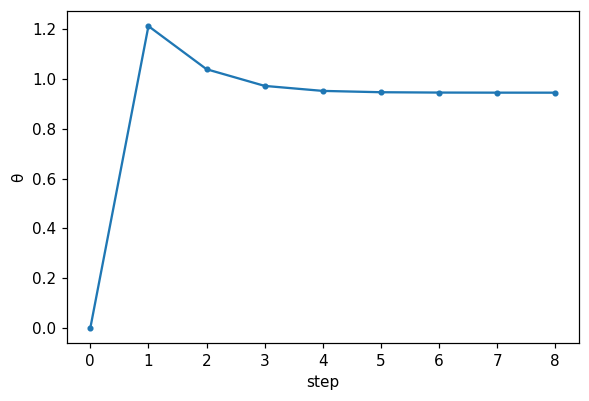

In [7]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

## With Jax

In [8]:
import jax
import jax.numpy as jnp
from muse_inference.jax import JittedJaxMuseProblem

In [9]:
class JaxFunnelMuseProblem(JittedJaxMuseProblem):
    
    def __init__(self, N):
        self.N = N

    def sample_x_z(self, rng, θ):
        z = rng.randn(self.N) * np.exp(θ/2)
        x = z + rng.randn(self.N)
        return (x, z)

    def logLike(self, x, z, θ):
        return -(jnp.sum((x - z)**2) + jnp.sum(z**2) / jnp.exp(θ) + 512*θ) / 2
    
    def logPrior(self, θ):
        return -θ**2 / (2*3**2)
    

In [10]:
prob = JaxFunnelMuseProblem(512)
rng = np.random.RandomState(0)
(x, z) = prob.sample_x_z(rng, θ_true)
prob.x = x

In [11]:
result = MuseResult()
muse(result, prob, 0., α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 1/1010 [00:02<39:59,  2.38s/it]

  0%|          | 5/1010 [00:02<06:21,  2.63it/s]

  1%|          | 10/1010 [00:02<02:45,  6.04it/s]

  1%|▏         | 15/1010 [00:02<01:39,  9.98it/s]

  2%|▏         | 19/1010 [00:02<01:14, 13.37it/s]

  2%|▏         | 23/1010 [00:02<00:59, 16.66it/s]

  3%|▎         | 27/1010 [00:03<00:48, 20.30it/s]

  3%|▎         | 31/1010 [00:03<00:41, 23.75it/s]

  3%|▎         | 35/1010 [00:03<00:36, 26.60it/s]

  4%|▍         | 39/1010 [00:03<00:32, 29.53it/s]

  4%|▍         | 43/1010 [00:03<00:30, 31.60it/s]

  5%|▍         | 47/1010 [00:03<00:28, 33.47it/s]

  5%|▌         | 52/1010 [00:03<00:26, 35.54it/s]

  6%|▌         | 57/1010 [00:03<00:25, 37.40it/s]

  6%|▌         | 62/1010 [00:03<00:24, 38.64it/s]

  7%|▋         | 67/1010 [00:04<00:23, 39.44it/s]

  7%|▋         | 72/1010 [00:04<00:23, 39.88it/s]

  8%|▊         | 77/1010 [00:04<00:24, 38.43it/s]

  8%|▊         | 82/1010 [00:04<00:23, 38.68it/s]

  9%|▊         | 87/1010 [00:04<00:23, 39.42it/s]

  9%|▉         | 92/1010 [00:04<00:23, 39.78it/s]

 10%|▉         | 97/1010 [00:04<00:22, 40.33it/s]

 10%|█         | 102/1010 [00:07<02:35,  5.82it/s]

 10%|█         | 106/1010 [00:07<02:01,  7.44it/s]

 11%|█         | 111/1010 [00:07<01:29, 10.02it/s]

 11%|█▏        | 116/1010 [00:07<01:08, 13.09it/s]

 12%|█▏        | 121/1010 [00:07<00:53, 16.57it/s]

 12%|█▏        | 126/1010 [00:07<00:43, 20.24it/s]

 13%|█▎        | 131/1010 [00:08<00:36, 24.02it/s]

 13%|█▎        | 136/1010 [00:08<00:32, 27.25it/s]

 14%|█▍        | 141/1010 [00:08<00:28, 30.49it/s]

 14%|█▍        | 146/1010 [00:08<00:26, 33.19it/s]

 15%|█▍        | 151/1010 [00:08<00:24, 35.40it/s]

 15%|█▌        | 156/1010 [00:08<00:23, 36.63it/s]

 16%|█▌        | 161/1010 [00:08<00:22, 37.28it/s]

 16%|█▋        | 166/1010 [00:08<00:21, 38.62it/s]

 17%|█▋        | 171/1010 [00:09<00:21, 39.73it/s]

 17%|█▋        | 176/1010 [00:09<00:21, 39.32it/s]

 18%|█▊        | 181/1010 [00:09<00:21, 39.10it/s]

 18%|█▊        | 186/1010 [00:09<00:20, 39.97it/s]

 19%|█▉        | 191/1010 [00:09<00:20, 40.21it/s]

 19%|█▉        | 196/1010 [00:09<00:19, 40.74it/s]

 20%|█▉        | 201/1010 [00:09<00:19, 40.95it/s]

 20%|██        | 206/1010 [00:10<00:23, 33.66it/s]

 21%|██        | 211/1010 [00:10<00:22, 35.75it/s]

 21%|██▏       | 216/1010 [00:10<00:21, 37.49it/s]

 22%|██▏       | 221/1010 [00:10<00:20, 38.57it/s]

 22%|██▏       | 226/1010 [00:10<00:19, 39.46it/s]

 23%|██▎       | 231/1010 [00:10<00:19, 39.93it/s]

 23%|██▎       | 236/1010 [00:10<00:19, 39.71it/s]

 24%|██▍       | 241/1010 [00:10<00:19, 39.09it/s]

 24%|██▍       | 246/1010 [00:11<00:19, 39.71it/s]

 25%|██▍       | 251/1010 [00:11<00:18, 40.22it/s]

 25%|██▌       | 256/1010 [00:11<00:18, 40.30it/s]

 26%|██▌       | 261/1010 [00:11<00:18, 40.48it/s]

 26%|██▋       | 266/1010 [00:11<00:18, 40.81it/s]

 27%|██▋       | 271/1010 [00:11<00:18, 40.67it/s]

 27%|██▋       | 276/1010 [00:11<00:17, 41.00it/s]

 28%|██▊       | 281/1010 [00:11<00:18, 40.41it/s]

 28%|██▊       | 286/1010 [00:12<00:17, 40.43it/s]

 29%|██▉       | 291/1010 [00:12<00:17, 41.03it/s]

 29%|██▉       | 296/1010 [00:12<00:17, 41.44it/s]

 30%|██▉       | 301/1010 [00:12<00:16, 41.72it/s]

 30%|███       | 306/1010 [00:12<00:16, 43.04it/s]

 31%|███       | 313/1010 [00:12<00:14, 48.69it/s]

 32%|███▏      | 320/1010 [00:12<00:13, 52.96it/s]

 32%|███▏      | 327/1010 [00:12<00:12, 55.65it/s]

 33%|███▎      | 333/1010 [00:12<00:12, 54.03it/s]

 34%|███▎      | 339/1010 [00:13<00:12, 52.03it/s]

 34%|███▍      | 345/1010 [00:13<00:12, 53.52it/s]

 35%|███▍      | 352/1010 [00:13<00:11, 55.85it/s]

 35%|███▌      | 358/1010 [00:13<00:11, 56.90it/s]

 36%|███▌      | 365/1010 [00:13<00:11, 58.55it/s]

 37%|███▋      | 372/1010 [00:13<00:10, 59.77it/s]

 38%|███▊      | 379/1010 [00:13<00:10, 60.80it/s]

 38%|███▊      | 386/1010 [00:13<00:10, 60.58it/s]

 39%|███▉      | 393/1010 [00:13<00:10, 58.44it/s]

 40%|███▉      | 400/1010 [00:14<00:10, 59.66it/s]

 40%|████      | 406/1010 [00:14<00:10, 59.13it/s]

 41%|████      | 412/1010 [00:14<00:10, 58.34it/s]

 41%|████▏     | 419/1010 [00:14<00:09, 59.19it/s]

 42%|████▏     | 426/1010 [00:14<00:09, 60.08it/s]

 43%|████▎     | 433/1010 [00:14<00:09, 61.05it/s]

 44%|████▎     | 440/1010 [00:14<00:09, 61.49it/s]

 44%|████▍     | 447/1010 [00:14<00:09, 60.50it/s]

 45%|████▍     | 454/1010 [00:14<00:09, 60.66it/s]

 46%|████▌     | 461/1010 [00:15<00:09, 60.27it/s]

 46%|████▋     | 468/1010 [00:15<00:08, 60.41it/s]

 47%|████▋     | 475/1010 [00:15<00:08, 60.62it/s]

 48%|████▊     | 482/1010 [00:15<00:08, 61.22it/s]

 48%|████▊     | 489/1010 [00:15<00:08, 61.36it/s]

 49%|████▉     | 496/1010 [00:15<00:08, 62.08it/s]

 50%|████▉     | 503/1010 [00:15<00:08, 62.65it/s]

 50%|█████     | 510/1010 [00:15<00:08, 58.38it/s]

 51%|█████     | 516/1010 [00:15<00:08, 58.41it/s]

 52%|█████▏    | 522/1010 [00:16<00:08, 56.27it/s]

 52%|█████▏    | 528/1010 [00:16<00:08, 56.76it/s]

 53%|█████▎    | 534/1010 [00:16<00:08, 55.65it/s]

 53%|█████▎    | 540/1010 [00:16<00:08, 55.23it/s]

 54%|█████▍    | 546/1010 [00:16<00:08, 56.45it/s]

 55%|█████▍    | 553/1010 [00:16<00:07, 58.25it/s]

 55%|█████▌    | 560/1010 [00:16<00:07, 59.81it/s]

 56%|█████▌    | 566/1010 [00:16<00:07, 59.15it/s]

 57%|█████▋    | 573/1010 [00:16<00:07, 60.29it/s]

 57%|█████▋    | 580/1010 [00:17<00:07, 59.68it/s]

 58%|█████▊    | 587/1010 [00:17<00:07, 60.32it/s]

 59%|█████▉    | 594/1010 [00:17<00:06, 61.17it/s]

 60%|█████▉    | 601/1010 [00:17<00:06, 61.32it/s]

 60%|██████    | 608/1010 [00:17<00:06, 60.76it/s]

 61%|██████    | 615/1010 [00:17<00:06, 61.75it/s]

 62%|██████▏   | 622/1010 [00:17<00:06, 62.48it/s]

 62%|██████▏   | 629/1010 [00:17<00:06, 62.01it/s]

 63%|██████▎   | 636/1010 [00:17<00:05, 62.50it/s]

 64%|██████▎   | 643/1010 [00:18<00:06, 60.76it/s]

 64%|██████▍   | 650/1010 [00:18<00:05, 60.92it/s]

 65%|██████▌   | 657/1010 [00:18<00:05, 61.21it/s]

 66%|██████▌   | 664/1010 [00:18<00:05, 60.96it/s]

 66%|██████▋   | 671/1010 [00:18<00:05, 61.50it/s]

 67%|██████▋   | 678/1010 [00:18<00:05, 61.55it/s]

 68%|██████▊   | 685/1010 [00:18<00:05, 61.83it/s]

 69%|██████▊   | 692/1010 [00:18<00:05, 61.17it/s]

 69%|██████▉   | 699/1010 [00:19<00:05, 61.04it/s]

 70%|██████▉   | 706/1010 [00:19<00:04, 60.96it/s]

 71%|███████   | 713/1010 [00:19<00:04, 59.55it/s]

 71%|███████▏  | 720/1010 [00:19<00:04, 59.77it/s]

 72%|███████▏  | 726/1010 [00:19<00:04, 59.06it/s]

 72%|███████▏  | 732/1010 [00:19<00:04, 58.30it/s]

 73%|███████▎  | 738/1010 [00:19<00:04, 57.86it/s]

 74%|███████▍  | 745/1010 [00:19<00:04, 58.61it/s]

 74%|███████▍  | 751/1010 [00:19<00:04, 58.91it/s]

 75%|███████▌  | 758/1010 [00:20<00:04, 59.78it/s]

 76%|███████▌  | 765/1010 [00:20<00:04, 60.52it/s]

 76%|███████▋  | 772/1010 [00:20<00:03, 61.31it/s]

 77%|███████▋  | 779/1010 [00:20<00:03, 60.36it/s]

 78%|███████▊  | 786/1010 [00:20<00:03, 59.55it/s]

 79%|███████▊  | 793/1010 [00:20<00:03, 60.49it/s]

 79%|███████▉  | 800/1010 [00:20<00:03, 60.93it/s]

 80%|███████▉  | 807/1010 [00:20<00:03, 60.20it/s]

 81%|████████  | 814/1010 [00:20<00:03, 58.56it/s]

 81%|████████▏ | 821/1010 [00:21<00:03, 59.56it/s]

 82%|████████▏ | 827/1010 [00:21<00:03, 58.60it/s]

 83%|████████▎ | 834/1010 [00:21<00:02, 59.49it/s]

 83%|████████▎ | 841/1010 [00:21<00:02, 60.40it/s]

 84%|████████▍ | 848/1010 [00:21<00:02, 61.47it/s]

 85%|████████▍ | 855/1010 [00:21<00:02, 60.36it/s]

 85%|████████▌ | 862/1010 [00:21<00:02, 55.73it/s]

 86%|████████▌ | 869/1010 [00:21<00:02, 57.89it/s]

 87%|████████▋ | 875/1010 [00:21<00:02, 58.42it/s]

 87%|████████▋ | 882/1010 [00:22<00:02, 60.39it/s]

 88%|████████▊ | 889/1010 [00:22<00:01, 61.08it/s]

 89%|████████▊ | 896/1010 [00:22<00:01, 60.72it/s]

 89%|████████▉ | 903/1010 [00:22<00:01, 62.71it/s]

100%|██████████| 1010/1010 [00:22<00:00, 341.16it/s]

100%|██████████| 1010/1010 [00:22<00:00, 44.81it/s] 

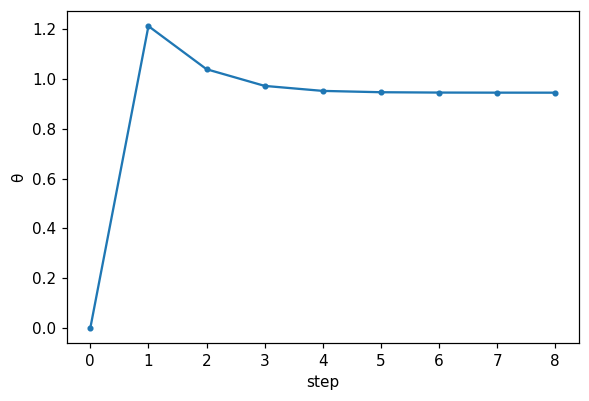

In [12]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

## With PyMC

In [13]:
import pymc as pm
from muse_inference.pymc import PyMCMuseProblem

In [14]:
def gen_funnel(x=None, θ=None, rng_seeder=None):
    with pm.Model(rng_seeder=rng_seeder) as funnel:
        θ = θ if θ else pm.Normal("θ", 0, 3)
        z = pm.Normal("z", 0, np.exp(θ / 2), size=512)
        x = pm.Normal("x", z, 1, observed=x)
    return funnel
        
rng = np.random.RandomState(0)
x_obs = pm.sample_prior_predictive(1, model=gen_funnel(θ=θ_true, rng_seeder=rng)).prior.x[0,0]
funnel = gen_funnel(x_obs)
prob = PyMCMuseProblem(funnel)
prob.x = x_obs

In [15]:
result = MuseResult()
muse(result, prob, 0., α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  5%|▌         | 52/1010 [00:00<00:01, 519.43it/s]

 10%|█         | 104/1010 [00:04<00:46, 19.57it/s]

 16%|█▌        | 164/1010 [00:04<00:22, 37.35it/s]

 20%|██        | 204/1010 [00:08<00:42, 18.89it/s]

 27%|██▋       | 268/1010 [00:09<00:23, 31.97it/s]

 30%|███       | 307/1010 [00:13<00:37, 18.66it/s]

 37%|███▋      | 373/1010 [00:13<00:21, 30.21it/s]

 41%|████      | 412/1010 [00:18<00:31, 18.99it/s]

 47%|████▋     | 478/1010 [00:18<00:17, 29.91it/s]

 51%|█████     | 517/1010 [00:22<00:25, 19.11it/s]

 58%|█████▊    | 581/1010 [00:22<00:14, 29.40it/s]

 61%|██████▏   | 620/1010 [00:26<00:20, 18.96it/s]

 68%|██████▊   | 686/1010 [00:27<00:11, 29.44it/s]

 72%|███████▏  | 725/1010 [00:31<00:15, 18.96it/s]

 78%|███████▊  | 787/1010 [00:31<00:07, 28.65it/s]

 82%|████████▏ | 825/1010 [00:35<00:09, 18.68it/s]

 88%|████████▊ | 891/1010 [00:36<00:04, 29.05it/s]

100%|██████████| 1010/1010 [00:40<00:00, 28.07it/s]

100%|██████████| 1010/1010 [00:40<00:00, 24.98it/s]

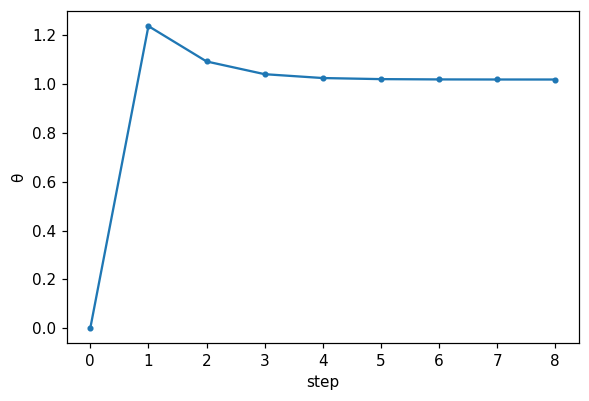

In [16]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");